# Neural Networks (ANN)

## Xuan Pham

In [1]:
#load packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os as os
%matplotlib inline 
import sys

#basic methods from scikit learn package
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
print("The Python version is %s.%s.%s" % sys.version_info[:3])

The Python version is 3.7.6


In [3]:
%pwd

'C:\\Users\\Xuan Pham\\Dropbox\\Summer_2020\\BIA6303_class_git\\BIA6303PredictiveModels\\Module5\\code'

In [4]:
cd C:\\Users\\Xuan Pham\\Dropbox\\Summer_2020\\BIA6303_class_git\\BIA6303PredictiveModels\\Module5\\data

C:\Users\Xuan Pham\Dropbox\Summer_2020\BIA6303_class_git\BIA6303PredictiveModels\Module5\data


In [5]:
#import data
df = pd.read_csv("Churn_Calls.csv", sep=",")
df.shape

(5000, 20)

In [6]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1,no
1,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,no
2,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1,yes
3,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1,no
4,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0,no


Our target variable is churn (last column). 

In [7]:
df.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [8]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Moving the churn column to the front. 

In [9]:
# designate target variable name
targetName = 'churn'
#print(targetName)
targetSeries = df[targetName] #notice one column is considered a series in pandas
#print(targetSeries)
#remove target from current location and insert in column number 0
del df[targetName]
df.insert(0, targetName, targetSeries)
#reprint dataframe and see target is in position 0
df.head(5)

,churn,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,no,AK,1,area_code_408,no,no,0,175.2,74,29.78,151.7,79,12.89,230.5,109,10.37,5.3,3,1.43,1
1,no,AK,36,area_code_408,no,yes,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
2,yes,AK,36,area_code_415,yes,yes,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
3,no,AK,41,area_code_415,no,no,0,159.3,66,27.08,125.9,75,10.70,261.9,76,11.79,11.1,5,3.00,1
4,no,AK,42,area_code_415,no,no,0,171.0,129,29.07,183.9,96,15.63,130.2,90,5.86,4.6,6,1.24,0


## Some Exploratory Data Analysis & Data Preprocessing

churn
no     4293
yes     707
Name: churn, dtype: int64


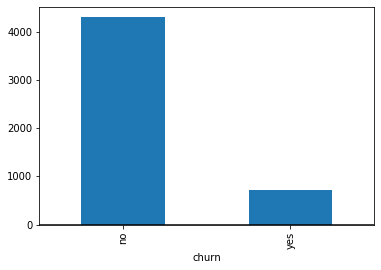

In [10]:
#Basic bar chart since the target is binominal
groupby = df.groupby(targetName)
targetEDA=groupby[targetName].aggregate(len)
print(targetEDA)
plt.figure()
targetEDA.plot(kind='bar', grid=False)
plt.axhline(0, color='k')

14% of the customers churned. If we are going to use a machine learning model, it needs to have better predictive performance than 86%.

We are going to do two preprocessing tasks: 1) change the target column to a numeric since many models in Scikit Learn requires integers/numeric; and 2) create dummy variables for the categorical variables. 

In [11]:
# This code turns a character/text target variable into numeric one
from sklearn import preprocessing
le_dep = preprocessing.LabelEncoder()
#to convert into numbers
df['churn'] = le_dep.fit_transform(df['churn'])

# perform data transformation. Creates dummy variables for categorical variables. 
# very similar to the dummies() function in the dummy package in R
# I did not write this code chunk but cannot find the source to give proper credit to its creator. 
#If you do find the source, please let me know.
for col in df.columns[1:]:
	attName = col
	dType = df[col].dtype
	missing = pd.isnull(df[col]).any()
	uniqueCount = len(df[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
		del df[attName]

In [12]:
df.shape

(5000, 74)

In [13]:
df.columns

Index(['churn', 'account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'sta

## Train/Test or the Holdout Method

I am using a 60/40 split (60% trainining set and 40% test set) since this is an unbalanced dataset. The features are stored in "features_train" and "features_test". The targets are in "target_train" and "target_test". 

In [15]:
# split dataset into testing and training
# column location 1 to end of dataframe are the features.
# column location 0 is the target
from sklearn.model_selection  import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
    df.iloc[:,1:].values, df.iloc[:,0].values, test_size=0.40, random_state=0)

In [16]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)
print("Percent of Target that is Yes", target_test.mean())

(2000, 73)
(3000, 73)
(2000,)
(3000,)
Percent of Target that is Yes 0.146


## Multilayer Perceptron Model (MLP)

You should always scale your data before training neural network models. It is best practice to scale your features so that each feature has a mean of as close to 0 as possible. Two popular normalization methods are 1) Min-Max normalization and 2) z-score normalization (mean = 0; standard deviation = 1). Neural networks train and converge faster when features are normalized.

Here is the scikit-learn documentation for MLP:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [17]:
from sklearn.preprocessing import StandardScaler  
#Build
scaler = StandardScaler()  
#Train
scaler.fit(features_train)  
#Validate
features_train_norm = scaler.transform(features_train)  
# apply same transformation to test data
features_test_norm = scaler.transform(features_test) 

In [22]:
#Build
from sklearn.neural_network import MLPClassifier
clf_nn = MLPClassifier(hidden_layer_sizes=(5),random_state=0) #one hidden layer with five units/nodes
#clf_nn = MLPClassifier(hidden_layer_sizes=(5), solver="lbfgs",random_state=0) #one hidden layer with five units/nodes
#clf_nn = MLPClassifier(hidden_layer_sizes=(5), solver="sgd", learning_rate="adaptive", max_iter=1000,random_state=0)
#clf_nn = MLPClassifier(hidden_layer_sizes=(5,5), solver="sgd", learning_rate="adaptive", max_iter=1000,random_state=0)
#clf_nn = MLPClassifier(hidden_layer_sizes=(20,20), solver="sgd", learning_rate="adaptive", max_iter=10000,random_state=0)
#Train
clf_nn.fit(features_train_norm, target_train)
#Validate
target_predicted = clf_nn.predict(features_test_norm)
print("Accuracy", accuracy_score(target_test, target_predicted))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted, target_names=target_names))
print(confusion_matrix(target_test, target_predicted))

Accuracy 0.897
              precision    recall  f1-score   support

  Churn = no       0.94      0.94      0.94      1708
 Churn = yes       0.65      0.63      0.64       292

    accuracy                           0.90      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.90      0.90      0.90      2000

[[1609   99]
 [ 107  185]]


## Stochastic Gradient Descent Classifier

Stochastic Gradient Descent can also be used to solve the loss functions of other algorithms besides neural networks. scikit-learn has two classes for fitting linear models: SGDClassifier and SGDRegressor. Here is the documentation: https://scikit-learn.org/stable/modules/linear_model.html#stochastic-gradient-descent-sgd

It is recommended to scale your data before using SGD.

In [23]:
#Build
from sklearn.linear_model import SGDClassifier
clf_sgd_linear_svm = SGDClassifier(random_state=0)
#Train
clf_sgd_linear_svm.fit(features_train_norm, target_train)
#Validate
target_predicted = clf_sgd_linear_svm.predict(features_test_norm)
print("Accuracy", accuracy_score(target_test, target_predicted))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted, target_names=target_names))
print(confusion_matrix(target_test, target_predicted))

Accuracy 0.8515
              precision    recall  f1-score   support

  Churn = no       0.88      0.95      0.92      1708
 Churn = yes       0.48      0.26      0.34       292

    accuracy                           0.85      2000
   macro avg       0.68      0.61      0.63      2000
weighted avg       0.82      0.85      0.83      2000

[[1626   82]
 [ 215   77]]


In [24]:
#Build
from sklearn.linear_model import SGDClassifier
import time
start = time.time()
clf_sgd_logit = SGDClassifier(loss='log', random_state=0)
#Train
clf_sgd_logit.fit(features_train_norm, target_train)
end = time.time()
print("Training time is", end-start)
#Validate
target_predicted = clf_sgd_logit.predict(features_test_norm)
print("Accuracy", accuracy_score(target_test, target_predicted))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted, target_names=target_names))
print(confusion_matrix(target_test, target_predicted))

Training time is 0.05584859848022461
Accuracy 0.847
              precision    recall  f1-score   support

  Churn = no       0.88      0.95      0.91      1708
 Churn = yes       0.46      0.25      0.32       292

    accuracy                           0.85      2000
   macro avg       0.67      0.60      0.62      2000
weighted avg       0.82      0.85      0.83      2000

[[1621   87]
 [ 219   73]]


Let's briefly compare this to the LogisticRegression class in sklearn.linear_model

In [25]:
#Build
from sklearn.linear_model import LogisticRegression
import time
start = time.time()
clf_lr_logit = LogisticRegression(solver = 'lbfgs', random_state=0) #default solver
#Train
clf_lr_logit.fit(features_train_norm, target_train)
end = time.time()
print("Training time is", end-start)
#Validate
target_predicted = clf_lr_logit.predict(features_test_norm)
print("Accuracy", accuracy_score(target_test, target_predicted))
target_names = ["Churn = no", "Churn = yes"]
print(classification_report(target_test, target_predicted, target_names=target_names))
print(confusion_matrix(target_test, target_predicted))

Training time is 0.012930870056152344
Accuracy 0.86
              precision    recall  f1-score   support

  Churn = no       0.88      0.96      0.92      1708
 Churn = yes       0.54      0.25      0.34       292

    accuracy                           0.86      2000
   macro avg       0.71      0.61      0.63      2000
weighted avg       0.83      0.86      0.84      2000

[[1647   61]
 [ 219   73]]


## MLP: A Numeric Prediction Example

We are going to load in the boston dataset, which is a built-in dataset in scikit-learn. The data is loaded as a dictionary, so we need to convert it to a dataframe using pandas.

In [28]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston["feature_names"])
features = pd.DataFrame.from_dict(boston["data"])
target = pd.DataFrame.from_dict(boston["target"])
df = pd.concat([target, features], axis=1)
df.head

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


<bound method NDFrame.head of        0        0     1      2    3      4      5     6       7    8      9   \
0    24.0  0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    21.6  0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    34.7  0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    33.4  0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    36.2  0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..    ...      ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   
501  22.4  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  20.6  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  23.9  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  22.0  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  11.9  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

       10

In [29]:
# split dataset into testing and training
# column location 1 to end of dataframe are the features.
# column location 0 is the target
from sklearn.model_selection  import train_test_split
features_train, features_test, target_train, target_test = train_test_split(
    df.iloc[:,1:].values, df.iloc[:,0].values, test_size=0.20, random_state=0)

In [30]:
print(features_test.shape)
print(features_train.shape)
print(target_test.shape)
print(target_train.shape)

(102, 13)
(404, 13)
(102,)
(404,)


In [32]:
#Build
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
#clf_nn = make_pipeline(MinMaxScaler(), MLPRegressor(hidden_layer_sizes=5, max_iter=10000, random_state=0))
clf_nn = make_pipeline(MinMaxScaler(), MLPRegressor(hidden_layer_sizes=(20,20), max_iter=10000, random_state=0))
#Train
clf_nn.fit(features_train, target_train)
#Validate
target_predicted = clf_nn.predict(features_test)
#print(target_predicted)
#print(target_test.head)
print("MSE", mean_squared_error(target_test, target_predicted)) 

MSE 32.47803337802954
